[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An√°lisis%20Estad√≠stico%20de%20Datos/notebooks/1_Fundamentos_Analisis_Estadistico.ipynb)

# 2. Introducci√≥n al An√°lisis Estad√≠stico de Datos

El an√°lisis estad√≠stico de datos es el proceso de:
    
   - recopilar
   - organizar 
   - describir 
   - interpretar datos 

para **extraer conclusiones** y apoyar la toma de **decisiones informadas**. 

En esencia, la estad√≠stica **‚Äúse encarga de recabar datos, organizarlos, analizarlos y presentarlos para poder predecir situaciones futuras‚Äù**

![Types](../imgs/Tipos_analisis.png)

## Breve ejemplo pr√°ctico
### An√°lisis Estad√≠stico Descriptivo

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generamos datos simulados de salarios en una empresa (en miles de d√≥lares)
np.random.seed(42)
salarios = np.random.normal(loc=50, scale=10, size=100)  # Media 50, Desviaci√≥n 10

# Crear un DataFrame con los datos simulados
df = pd.DataFrame({'Salarios': salarios})
df.describe()

Salarios
count  100.000000
mean    48.961535
std      9.081684
min     23.802549
25%     43.990943
50%     48.730437
75%     54.059521
max     68.522782

In [69]:
media = df['Salarios'].mean()
mediana = df['Salarios'].median()

## Visualizaci√≥n de los datos

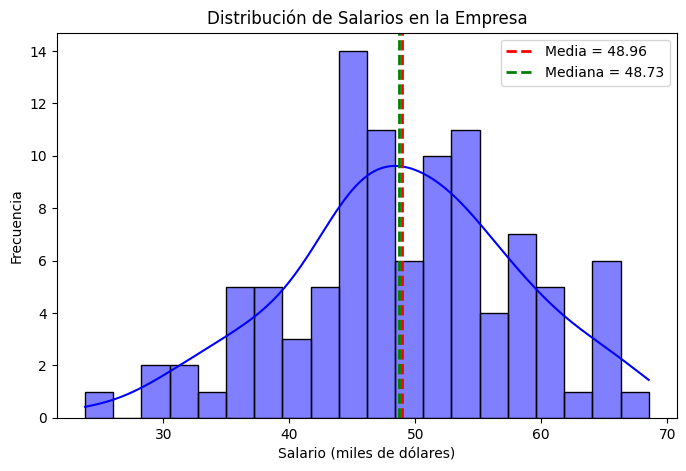

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salarios'], kde=True, bins=20, color='blue')
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(mediana, color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {mediana:.2f}')
plt.legend()
plt.title("Distribuci√≥n de Salarios en la Empresa")
plt.xlabel("Salario (miles de d√≥lares)")
plt.ylabel("Frecuencia")
plt.show()

## Inferencia Estad√≠stica (Prueba de Hip√≥tesis)

In [71]:
# Prueba t de una muestra
t_stat, p_value = stats.ttest_1samp(df['Salarios'], popmean=50)

print(f"Prueba de Hip√≥tesis (Test t):")
print(f"Estad√≠stico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluaci√≥n de la hip√≥tesis
alpha = 0.05  # Nivel de significancia 5%
if p_value < alpha:
    print("Rechazamos H‚ÇÄ: El salario promedio es significativamente diferente de 52K")
else:
    print("No se rechaza H‚ÇÄ: No hay evidencia suficiente para decir que el salario promedio es diferente de 52K")


Prueba de Hip√≥tesis (Test t):
Estad√≠stico t: -1.1435
Valor p: 0.2556
No se rechaza H‚ÇÄ: No hay evidencia suficiente para decir que el salario promedio es diferente de 52K


-------
# 2.1. Tipos de datos estad√≠sticos

Para construir un **pipeline** adecuado en ciencia de datos, debemos tener un buen entendimiento del tipo de variables que estaremos percibiendo de los diferentes conjuntos de datos (datasets) que nos podamos encontrar.

---

Veamos ahora los [conceptos estad√≠sticos b√°sicos](https://towardsdatascience.com/introduction-to-statistics-in-python-6f5a8876c994) relacionados con el tipo de datos que se estudian.

Se llama **variable estad√≠stica** a cada una de las caracter√≠sticas que pueden estudiarse de la poblaci√≥n (o de muestras).

![img](https://luminousmen.com/media/data-types-in-ds.jpeg)

Los datos <font color = red>**cualitativos**</font> (tambi√©n llamados *categ√≥ricos*) describen cualidades o categor√≠as y no se refieren a cantidades num√©ricas; por ejemplo, el color de ojos, el g√©nero o nivel educativo son datos cualitativos. Estos datos pueden incluso representarse con n√∫meros (p. ej., usar 1 para Femenino y 0 para Masculino), pero esos n√∫meros son solo etiquetas sin significado aritm√©tico

Los datos cualitativos se subdividen en:

  - **Datos nominales**: Categor√≠as sin orden intr√≠nseco (p. ej., nacionalidad, color favorito, marcas). Si intercambiamos las etiquetas, el significado no cambia.
    
  - **Datos ordinales**: Categor√≠as ordenadas de forma jer√°rquica o por rango (p. ej., nivel de satisfacci√≥n bajo/medio/alto, tama√±o de camiseta S/M/L). Aqu√≠ el orden s√≠ importa (alto > medio > bajo), aunque las diferencias entre categor√≠as no son num√©ricamente constantes.

---

Por otro lado, los datos <font color = blue>**cuantitativos**</font> son num√©ricos y resultan de conteos o mediciones (por ejemplo, la estatura de una persona en cent√≠metros, la cantidad de ventas mensuales o la temperatura en grados). Estos datos s√≠ admiten operaciones aritm√©ticas significativas. Los datos cuantitativos se clasifican a su vez en:

  - **Discretos**: Aquellos que solo pueden tomar ciertos valores espec√≠ficos (t√≠picamente enteros) resultantes de un conteo. Por ejemplo, el n√∫mero de hijos por familia (no se pueden tener 2.5 hijos) o la cantidad de autos vendidos en un d√≠a.

  - **Continuos**: Aquellos que pueden tomar cualquier valor dentro de un rango dado, normalmente resultado de mediciones. Por ejemplo, el peso de una persona (podr√≠a ser 70.2 kg, 70.25 kg, etc.) o el tiempo que tarda un algoritmo en ejecutarse. Entre dos valores continuos siempre es posible encontrar otros intermedios (limitados solo por la precisi√≥n del instrumento de medida).


### 2.1.1. An√°lisis de datos categ√≥ricos con Python

---

Cuando trabajamos con estad√≠sticas, es importante reconocer los diferentes tipos de datos: num√©ricos (discretos y continuos) y categ√≥ricos. Los datos no son m√°s que observaciones del mundo en el que vivimos, por tanto, los mismos pueden venir en diferentes maneras, no solo de forma num√©rica. 

---

Los datos se dividen en categor√≠as, pero los n√∫meros colocados en cada categor√≠a tienen un significado. Por ejemplo, la calificaci√≥n de un restaurante en una escala de 0 (bajo) a 5 (m√°s alta) estrellas representa datos ordinales. Los datos ordinales son a menudo tratados como datos categ√≥ricos, en el sentido que se suelen agrupar y ordenar. Sin embargo, a diferencia de los datos categ√≥ricos, los n√∫meros s√≠ tienen un significado matem√°tico.

---

![img](https://files.realpython.com/media/Descriptive-Statistics-in-Python_Watermarked.fec81e9a41f9.jpg)

In [72]:
#Uncomment if needed
#!pip install pydataset

In [73]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Se debe recordar que para la primera ejecuci√≥n de este c√≥digo, 
#se debe habilidar la instalaci√≥n de 'pydataset'

from pydataset import data
%matplotlib notebook
#A√±adir la siguiente l√≠nea de c√≥digo
%matplotlib inline 

In [74]:
# importando dataset
titanic = data('titanic')
# ver primeros 10 registros
titanic.head(10)
# visualizar toda la tabla, recordemos que el TIPO DE DATO de 'titanic' es un DataFrame de la paqueter√≠a Pandas
# titanic

class     age  sex survived
1   1st class  adults  man      yes
2   1st class  adults  man      yes
3   1st class  adults  man      yes
4   1st class  adults  man      yes
5   1st class  adults  man      yes
6   1st class  adults  man      yes
7   1st class  adults  man      yes
8   1st class  adults  man      yes
9   1st class  adults  man      yes
10  1st class  adults  man      yes

* La funci√≥n [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) se usa para imprimir un resumen conciso de un DataFrame. Este m√©todo imprime informaci√≥n, incluido el tipo de √≠ndice y los tipos de columna, los valores no nulos y el uso de la memoria.

In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 1 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     1316 non-null   object
 1   age       1316 non-null   object
 2   sex       1316 non-null   object
 3   survived  1316 non-null   object
dtypes: object(4)
memory usage: 51.4+ KB


* La funci√≥n [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) se utiliza para ver algunos detalles estad√≠sticos b√°sicos como percentiles, media, std, etc. de un DataFrame o una serie de valores num√©ricos. Cuando este m√©todo se aplica a una serie de Strings, devuelve una salida diferente que se muestra en los ejemplos a continuaci√≥n.

In [76]:
titanic.describe()

class     age   sex survived
count        1316    1316  1316     1316
unique          3       2     2        2
top     3rd class  adults   man       no
freq          706    1207   869      817

<center><font size=5 color = purple> El problema con datos como estos, y en general con la mayor√≠a de las tablas de datos, es que nos presentan mucha informaci√≥n y no nos permiten ver que es lo que realmente sucede o sucedi√≥. </font></center>

Por tanto, deber√≠amos procesarla de alguna manera para hacernos una imagen de lo que los datos realmente representan y nos quieren decir; y que mejor manera para hacernos una imagen de algo que utilizar **visualizaciones**.

-------

Una buena **visualizaci√≥n de los datos** puede revelar cosas que es probable que no podamos ver en una *tabla de n√∫meros* y nos ayudar√° a pensar con claridad acerca de los <font color = red>**patrones**</font> y <font color = red>**relaciones**</font> que pueden estar *escondidos* en los datos. 


Tambi√©n nos va a ayudar a encontrar las caracter√≠sticas y patrones m√°s importantes o los casos que son realmente excepcionales y no deber√≠amos de encontrar.

--------

### 2.1.2. Tablas de frecuencia

Para hacernos una *imagen de los datos*, lo primero que tenemos que hacer es agruparlos. 

Al armar diferentes grupos nos vamos acercando a la comprensi√≥n de los datos.

**La idea es ir agrupando las cosas que parecen ir juntas, para poder ver como se distribuyen a trav√©s de las diferentes categor√≠as**. 

Para los *datos categ√≥ricos*, agrupar es f√°cil; simplemente debemos contar el n√∫mero de √≠tems que corresponden a cada categor√≠a y juntarlos. 

Una forma en la que podemos agrupar nuestro dataset del Titanic es contando las diferentes clases de pasajeros. Podemos organizar estos conteos en una *tabla de frecuencia*, que registra los totales y los nombres de las categor√≠as utilizando la funci√≥n [**value_counts**](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) que nos proporciona Pandas del siguiente modo:

In [77]:
# tabla de frecuencia de clases de pasajeros
titanic['class'].value_counts()

class
3rd class    706
1st class    325
2nd class    285
Name: count, dtype: int64

Contar las cantidad de apariciones de cada categor√≠a puede ser √∫til, pero a veces puede resultar m√°s √∫til saber la *fracci√≥n* o proporci√≥n de los datos de cada **categor√≠a**, as√≠ que podr√≠amos entonces dividir los recuentos por el total de casos para obtener los porcentajes que representa cada categor√≠a.


---

Una tabla de **frecuencia relativa** muestra los porcentajes, en lugar de los recuentos de los valores en cada categor√≠a. Ambos tipos de tablas muestran c√≥mo los casos se distribuyen a trav√©s de las categor√≠as. 

De esta manera, ellas describen la distribuci√≥n de una variable categ√≥rica, ya que enumeran las posibles categor√≠as y nos dicen con qu√© frecuencia se produce cada una de ellas.

In [78]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['class'].value_counts() / len(titanic['class'])

class
3rd class    53.647416
1st class    24.696049
2nd class    21.656535
Name: count, dtype: float64

### 2.1.3. Gr√°ficos de pastel y barras

---

El gr√°fico de barras nos ayuda a darnos una impresi√≥n visual m√°s precisa de la distribuci√≥n de nuestros datos. 

La altura de cada barra muestra el recuento de su categor√≠a. Los barras tienen el mismo ancho, por lo que sus alturas determinan sus √°reas, y estas √°reas son proporcionales a los recuentos en cada categor√≠a. 

De esta forma, podemos ver f√°cilmente que hab√≠a m√°s del doble de pasajeros de tercera clase, que de primera o segunda clase. 

Los gr√°ficos de barras hacen que este tipo de comparaciones sean f√°ciles y naturales. Veamos como podemos crearlos de forma sencilla utilizando el m√©todo **plot** dentro de un **DataFrame** de **Pandas**.

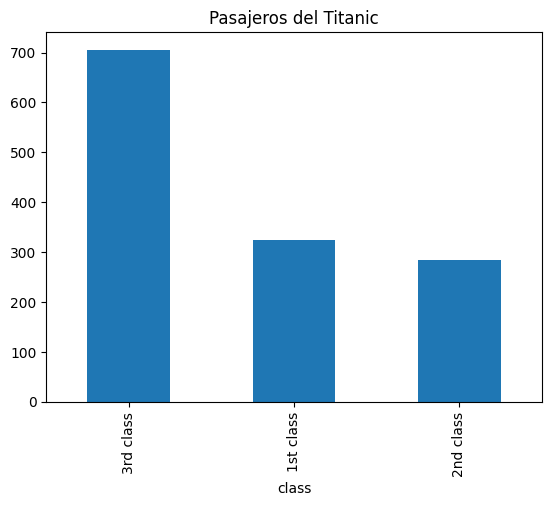

In [79]:
# Gr√°fico de barras de pasajeros del Titanic
# Se puede a√±adir %matplotlib inline
plot = titanic['class'].value_counts().plot(kind='bar', title='Pasajeros del Titanic')

Si quisi√©ramos enfocarnos en la proporci√≥n relativa de los pasajeros de cada una de las clases, simplemente podemos sustituir a los recuentos con porcentajes y utilizar un *gr√°fico de barras de frecuencias relativas*.

<Axes: title={'center': 'Pasajeros del Titanic %'}, xlabel='class'>

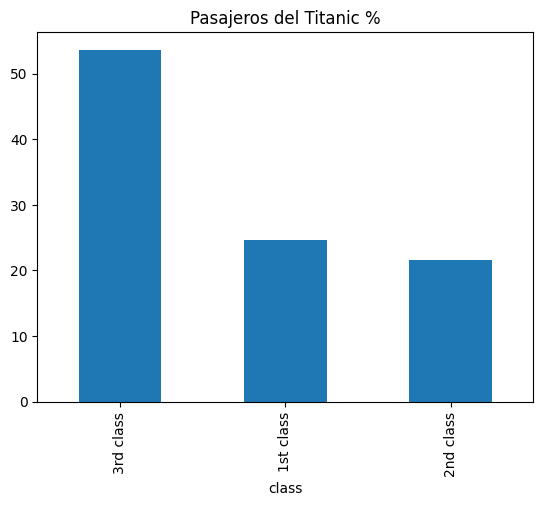

In [80]:
# gr√°fico de barras de frecuencias relativas.
plot = (100 * titanic['class'].value_counts() / len(titanic['class'])).plot(kind='bar', title='Pasajeros del Titanic %')
plot

### 2.1.4. Gr√°fico de pastel

---

El gr√°fico de pastel muestra el total de casos proporcionales a la fracci√≥n que cada categor√≠a representa. 

Los gr√°fico de pastel dan una impresi√≥n r√°pida de c√≥mo todo un grupo se divide en grupos m√°s peque√±os. Lo podr√≠amos graficar del siguiente modo, tambi√©n utilizando el m√©todo plot:

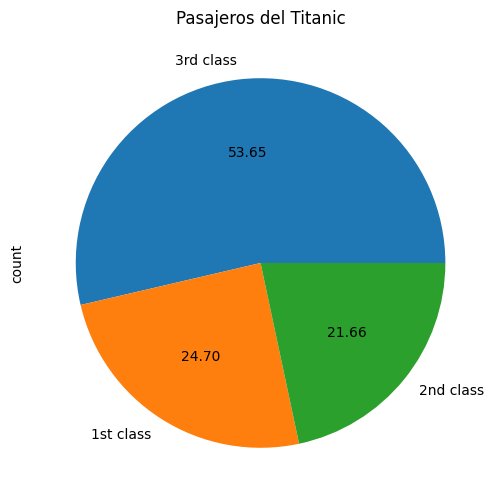

In [81]:
# Gr√°fico de tarta de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')

Como se puede apreciar, con el gr√°fico de pastel no es tan f√°cil determinar que los pasajeros de tercera clase son m√°s que el doble que los de primera clase; tampoco es f√°cil determinar si hay m√°s pasajeros de primera o de segunda clase. Para este tipo de comparaciones, son mucho m√°s √∫tiles los gr√°ficos de barras.

### 2.1.5. Relacionando variables categ√≥ricas¬∂

---

Al analizar la tragedia del Titanic, una de las preguntas que podr√≠amos hacer es **¬øexiste alguna relaci√≥n entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia?**. 

Para poder responder a esta pregunta, vamos a necesitar analizar a las variables **class** y **survived** de nuestro dataset en forma conjunta. 

---

Una buena forma de analizar dos variables categ√≥ricas en forma conjunta, es agrupar los recuentos en una tabla de doble entrada; este tipo de tablas se conocen en estad√≠stica con el nombre de tabla de contingencia. Veamos como podemos crear esta tabla utilizando la funci√≥n **crosstab** de **Pandas**.

In [82]:
titanic

class     age    sex survived
1     1st class  adults    man      yes
2     1st class  adults    man      yes
3     1st class  adults    man      yes
4     1st class  adults    man      yes
5     1st class  adults    man      yes
...         ...     ...    ...      ...
1312  3rd class   child  women       no
1313  3rd class   child  women       no
1314  3rd class   child  women       no
1315  3rd class   child  women       no
1316  3rd class   child  women       no

[1316 rows x 4 columns]

In [83]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class     1st class  2nd class  3rd class   All
survived                                       
no              122        167        528   817
yes             203        118        178   499
All             325        285        706  1316

Los m√°rgenes de la tabla, tanto en la derecha y en la parte inferior, nos muestran los totales. La l√≠nea inferior de la tabla representa la distribuci√≥n de frecuencia de la clase de pasajeros. 

La columna derecha de la tabla es la distribuci√≥n de frecuencia de la variable supervivencia. 

Cuando se presenta la informaci√≥n de este modo, cada celda de cada uno de los m√°rgenes de la tabla representa la *distribuci√≥n marginal* de esa variable en particular. 


Cada celda nos va a mostrar el recuento para la combinaci√≥n de los valores de nuestras dos variables categ√≥ricas, en este caso **class** y **survived**.

---

Al igual de como hab√≠amos visto con las tablas de frecuencia, tambi√©n nos podr√≠a ser √∫til representar a las tablas de contingencia con porcentajes relativos; esto lo podr√≠amos realizar utilizando el m√©todo apply del siguiente modo:

In [84]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['class'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)
# Es importante recordar que en la l√≠nea de c√≥digo anterior, al estar usando Pandas, podemos realizar la operaci√≥n
#APPLY, en donde realizamos un recorrido por el conjunto de datos, el cual estar√° considerando las l√≠neas o renglones
#dependiendo la asignaci√≥n de axis
# axis = 0 - renglones
# axis = 1 - columnas

# para este caso, es parecido el comportamiento de la tabla de contigencia
# pd.crosstab(index=titanic['survived'], columns=titanic['class'], margins=True).apply(lambda r: r/len(titanic) *100, axis=0)

class     1st class  2nd class  3rd class         All
survived                                             
no         9.270517  12.689970  40.121581   62.082067
yes       15.425532   8.966565  13.525836   37.917933
All       24.696049  21.656535  53.647416  100.000000

Con esta tabla podemos ver f√°cilmente que solo el 37.91% de los pasajeros sobrevivi√≥ a la tragedia y que este 37% se compone de la siguiente forma: del total de pasajeros sobrevivi√≥ un 15.42% de pasajeros que eran de primera clase, un 8.97% que eran de segunda clase y un 13.52% que eran pasajeros de tercera clase.

---

Volviendo a nuestra pregunta inicial sobre la posibilidad de sobrevivir seg√∫n la clase de pasajero, podr√≠a ser m√°s √∫til armar la tabla de porcentajes como un porcentaje relativo sobre el total de cada fila, es decir calcular el porcentaje relativo que cada clase tiene sobre haber sobrevivido o no. Esto lo podemos realizar del siguiente modo:

In [85]:
# tabla de contingencia en porcentajes relativos segun sobreviviente
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

# tabla de contingencia en porcentajes relativos segun sobreviviente con datos redondeados a 3 dig. significativos
# pd.crosstab(index=titanic['survived'], columns=titanic['class']).apply(lambda r: r/r.sum() *100, axis=1).round(3)

# Otro ejemplo de c√≥digo para el redondeo
# pd.crosstab(index=titanic['survived'], columns=titanic['class']).apply(lambda r: round(r/len(titanic),5) *100, axis=1)

class     1st class  2nd class  3rd class
survived                                 
no        14.932681  20.440636  64.626683
yes       40.681363  23.647295  35.671343

Aqu√≠ podemos ver que de los pasajeros que sobrevivieron a la tragedia, el 40.68% correspond√≠an a primera clase, el 35.67% a tercera clase y el 23.65% a segunda clase. Por tanto podr√≠amos inferir que los pasajeros de primera clase ten√≠an m√°s posibilidades de sobrevivir.

---

Es m√°s, tambi√©n podr√≠amos armar la tabla de porcentaje relativos en relaci√≥n al total de cada clase de pasajero y as√≠ podr√≠amos ver que de los pasajeros de primera clase, logr√≥ sobrevivir un 62.46%.

In [86]:
# tabla de contingencia en porcentajes relativos segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

####### Como a√±adir otras clomnas a la tabla de contigencia

#np.round(pd.crosstab(index=titanic['survived'], 
#                     columns=[titanic['class'],titanic['sex']],
#                     margins=True).apply(lambda r: r/len(titanic) *100,axis=1),2) . Redondeado a 2 dig. sig.

#pd.crosstab(index=titanic['survived'], 
#                     columns=[titanic['class'],titanic['sex']],
#                     margins=True)

class     1st class  2nd class  3rd class
survived                                 
no        37.538462  58.596491  74.787535
yes       62.461538  41.403509  25.212465

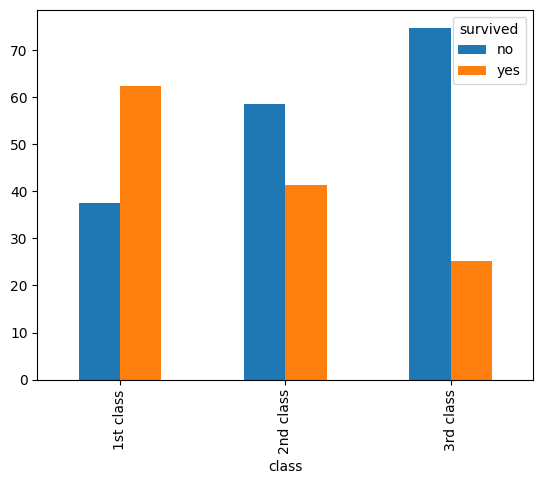

In [87]:
# Gr√°fico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['class'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

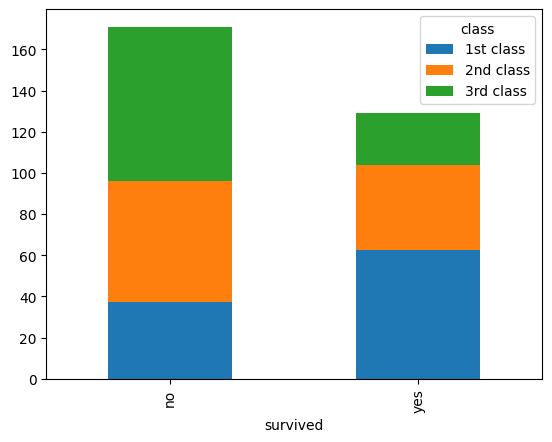

In [88]:
# Gr√°fico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['class']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

## Estas mismas manipulaciones las podemos realizar para otro tipo de combinaci√≥n de variables categ√≥ricas, como podr√≠a ser el sexo o la edad de los pasajeros, pero eso ya se los dejo a ustedes para que se entretengan y practiquen un rato.

---

En esta secci√≥n, vamos a ver como podemos manipular, interpretar y obtener informaci√≥n de los datos cuantitativos.

# Recordemos que las **variables cuantitativas** son variables medidas en una escala num√©rica. 
Altura, peso, tiempo de respuesta, la calificaci√≥n subjetiva del dolor, la temperatura, y la puntuaci√≥n en un examen, son ejemplos de variables cuantitativas. 


Las variables cuantitativas se distinguen de las variables categ√≥ricas (tambi√©n llamadas cualitativas) como el color favorito, religi√≥n, ciudad de nacimiento, y el deporte favorito; en las que no hay un orden o medida involucrados.

-----
-----
#  **Ejercicio Avanzado: An√°lisis de Supervivencia en el Titanic üö¢**

##  **Objetivo del Ejercicio**
En este ejercicio, analizaremos **c√≥mo influyeron la clase, el g√©nero y la edad en la supervivencia de los pasajeros del Titanic**. Para ello, responderemos las siguientes preguntas:

1.  **¬øCu√°l fue la tasa de supervivencia por clase y g√©nero?**
2.  **¬øLos ni√±os tuvieron m√°s probabilidades de sobrevivir que los adultos?**
3.  **¬øC√≥mo podemos visualizar estos patrones con gr√°ficos?**

---

### An√°lisis de Supervivencia por Clase y G√©nero
Queremos saber si la clase y el g√©nero influyeron en la supervivencia.

üîπ Tarea: Crea una tabla de contingencia que muestre la cantidad de personas que sobrevivieron y no sobrevivieron en cada combinaci√≥n de clase y g√©nero.

In [89]:
# Tabla de supervivencia por clase y g√©nero


                 No Sobrevivi√≥  Sobrevivi√≥  Total
class     sex                                    
1st class man              118          62    180
          women              4         141    145
2nd class man              154          25    179
          women             13          93    106
3rd class man              422          88    510
          women            106          90    196
All                        817         499   1316

Porcentaje de Supervivencia por Clase y G√©nero:
                 Sobrevivi√≥
class     sex              
1st class man     34.444444
          women   97.241379
2nd class man     13.966480
          women   87.735849
3rd class man     17.254902
          women   45.918367
All               37.917933


### An√°lisis de Supervivencia por Edad (Ni√±os vs Adultos)
Queremos saber si los ni√±os tuvieron m√°s probabilidades de sobrevivir que los adultos.

üîπ Tarea:

  - Crea una nueva columna en el dataset que clasifique a los pasajeros en "Ni√±o" o "Adulto" seg√∫n la columna age.

  - Genera una tabla de contingencia con la tasa de supervivencia por edad.

In [90]:
# Crear una nueva columna para diferenciar entre ni√±os y adultos



Tabla de Supervivencia por Edad:
           No Sobrevivi√≥  Sobrevivi√≥  Total
age_group                                  
Adulto               765         442   1207
Ni√±o                  52          57    109
All                  817         499   1316

Porcentaje de Supervivencia por Edad:
           Sobrevivi√≥
age_group            
Adulto      36.619718
Ni√±o        52.293578
All         37.917933


## Comparaci√≥n entre Clases y Edades
Ahora combinaremos clase y edad para ver si los ni√±os de primera clase tuvieron m√°s ventajas de supervivencia que los ni√±os de tercera clase.

üîπ Tarea:
   - Crea una tabla que muestre la tasa de supervivencia por clase y grupo de edad.
   - Genera un gr√°fico de barras para visualizarlo.

In [91]:
# Tabla de supervivencia por clase y edad




Supervivencia por Clase y Grupo de Edad:
                     No Sobrevivi√≥  Sobrevivi√≥  Total
class     age_group                                  
1st class Adulto               122         197    319
          Ni√±o                   0           6      6
2nd class Adulto               167          94    261
          Ni√±o                   0          24     24
3rd class Adulto               476         151    627
          Ni√±o                  52          27     79
All                            817         499   1316

Porcentaje de Supervivencia por Clase y Edad:
                     Sobrevivi√≥
class     age_group            
1st class Adulto      61.755486
          Ni√±o       100.000000
2nd class Adulto      36.015326
          Ni√±o       100.000000
3rd class Adulto      24.082935
          Ni√±o        34.177215
All                   37.917933


----
----
----

### 2.1.6. Analizando datos cuantitativos con Python

---

Para los ejemplos de esta secci√≥n, vamos a trabajar con el dataset **faithful**, el cual consiste en una colecci√≥n de observaciones sobre las erupciones del g√©iser Old Faithful en el parque nacional Yellowstone de los Estados Unidos. La informaci√≥n que contiene este dataset es la siguiente:


In [92]:
#En esta secci√≥n seguimos utilizando la paqueter√≠a de 'pydataset', en caso de ser necesario, 
#habilita y ejecuta las siguientes l√≠neas de c√≥digo

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
%matplotlib inline 

faithful = data('faithful')
faithful

eruptions  waiting
1        3.600       79
2        1.800       54
3        3.333       74
4        2.283       62
5        4.533       85
..         ...      ...
268      4.117       81
269      2.150       46
270      4.417       90
271      1.817       46
272      4.467       74

[272 rows x 2 columns]

In [93]:
faithful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 1 to 272
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [94]:
faithful.describe()

eruptions     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000

Como podemos ver, faithful es un dataset bastante simple que solo contiene observaciones de dos variables; la primera, que se llama eruptions, contiene la informaci√≥n de la duraci√≥n de la erupci√≥n del g√©iser; mientras que la segunda, se llama waiting y contiene la informaci√≥n sobre el tiempo de espera para la siguiente erupci√≥n del g√©iser.

---

Al igual de como coment√°bamos cuando analizamos datos categ√≥ricos, lo primero que deber√≠amos intentar hacer es crear una imagen que represente de la mejor manera posible a nuestros datos, ya que nuestro cerebro tiende a procesar mejor la informaci√≥n visual. Para el caso de las variables cuantitativas, un buen candidato para comenzar a hacernos una imagen de lo que nuestros datos representan, son los **histogramas**.

### 2.1.7. Histogramas

---

Para las variables cuantitativas, a diferencia de lo que pasaba con las variables categ√≥ricas, no existe una forma obvia de agrupar los datos; por tal motivo lo que se suele hacer es, dividir los posibles valores en diferentes contenedores del mismo tama√±o y luego contar el n√∫mero de casos que cae dentro de cada uno de los contenedores. 


Estos contenedores junto con sus recuentos, nos proporcionan una imagen de la distribuci√≥n de la variable cuantitativa y constituyen la base para poder graficar el histograma. 


Para construir el gr√°fico, simplemente debemos representar a los recuentos como barras y graficarlas contra los valores de cada uno de los contenedores.


**Con Python podemos representar f√°cilmente el histograma de la variable eruptions utilizando el m√©todo *hist* del DataFrame de *Pandas* del siguiente modo**:

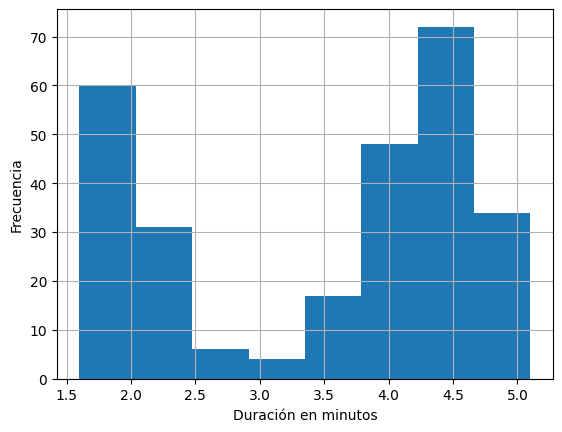

In [95]:
# histograma duraci√≥n de erupciones con 8 barras
faithful['eruptions'].hist(bins=8) 
plt.xlabel("Duraci√≥n en minutos")
plt.ylabel("Frecuencia")
plt.show()

---

Como podemos ver con este gr√°fico, la duraci√≥n m√°s frecuente de las erupciones del g√©iser ronda en alrededor de cuatro minutos y medio. Una cosa que debemos hacer notar es que en los histogramas, los contenedores dividen a todos los valores de la variable cuantitativa, por lo que no deber√≠amos encontrar espacios entre las barras (a diferencia de lo que pasaba con los gr√°ficos de barras que vimos en el art√≠culo anterior). 


Cualquier espacio entre las barras es una brecha en los datos, que nos indica un regi√≥n para la que no existen valores.

---

### 2.1.8. Distribuci√≥n de frecuencia
---

Un tema √≠ntimamente relacionado con los histogramas son las tablas de distribuci√≥n de frecuencia, en definitiva los histogramas no son m√°s que gr√°ficos de tablas de distribuci√≥n de frecuencia. La distribuci√≥n de frecuencia de una variable cuantitativa consiste en un resumen de la ocurrencia de un dato dentro de una colecci√≥n de categor√≠as que no se superponen.

Estas categor√≠as las vamos a poder armar seg√∫n nuestra conveniencia y lo que queramos analizar. Por ejemplo si quisi√©ramos armar la distribuci√≥n de frecuencia de la variable eruptions podr√≠amos realizar las siguiente manipulaciones con Pandas:

In [96]:
# Distribuci√≥n de frecuencia.
# 1ro creamos un rango para las categor√≠as.
contenedores = np.arange(1.5, 6., 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(faithful['eruptions'], contenedores)

# por √∫ltimo hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = frec.value_counts()
tabla_frec

eruptions
(4.0, 4.5]    75
(1.5, 2.0]    55
(4.5, 5.0]    54
(2.0, 2.5]    37
(3.5, 4.0]    34
(3.0, 3.5]     9
(2.5, 3.0]     5
(5.0, 5.5]     3
Name: count, dtype: int64

Como nos nuestra esta tabla de distribuci√≥n de frecuencia, la duraci√≥n que m√°s veces ocurre para las erupciones, se encuentran en el rango de 4 a 4.5 minutos.

---

### 2.1.9. Diagrama de dispersi√≥n
---

Hasta aqu√≠ venimos graficando √∫nicamente una sola variable cuantitativa pero **¬øqu√© pasa si queremos trabajar con dos variables?** Para estos casos existe el diagrama de dispersi√≥n. 

El *diagrama de dispersi√≥n* es una de las formas m√°s comunes que existen para visualizar datos y constituye una de las mejores forma de observar relaciones entre dos variables cuantitativas. 

Veremos que se puede observar un mont√≥n de cosas por el solo hecho de mirar. 

---
Este diagrama es una de las mejores formas de visualizar las asociaciones que pueden existir entre nuestros datos.

El diagrama de dispersi√≥n empareja los valores de dos variables cuantitativas y luego los representa como puntos geom√©tricos dentro de un diagrama cartesiano. 

Por ejemplo, volviendo a nuestro dataset faithful, podr√≠amos emparejar a las variables eruptions y waiting en la misma observaci√≥n como coordenadas (x, y) y luego graficarlas en el eje cartesiano. 

Con la ayuda de Python podr√≠amos generar el diagrama de dispersi√≥n del siguiente modo:

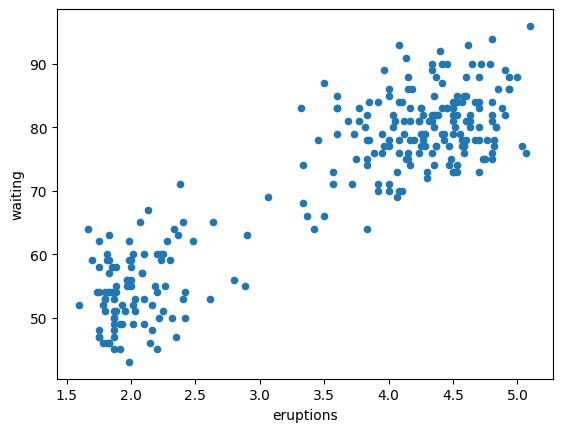

In [97]:
# diagrama de dispersi√≥n
disp= faithful.plot(kind='scatter', x='eruptions', y='waiting')

Como podemos ver con solo observar la dispersi√≥n de los datos parece existir una relaci√≥n lineal entre los datos de este dataset....

-----
-----
#  **Ejercicio Avanzado: Visualizaci√≥n y creaci√≥n de variable de Erupciones**

## Visualizaci√≥n de la Distribuci√≥n de las Erupciones
Es importante visualizar c√≥mo se distribuyen los datos.

üîπ Tarea:
   - Recrea los siguientes histogramas para visualizar la distribuci√≥n de duraci√≥n de erupciones y tiempo de espera.

   - Agrega l√≠neas que marquen la media y la mediana.

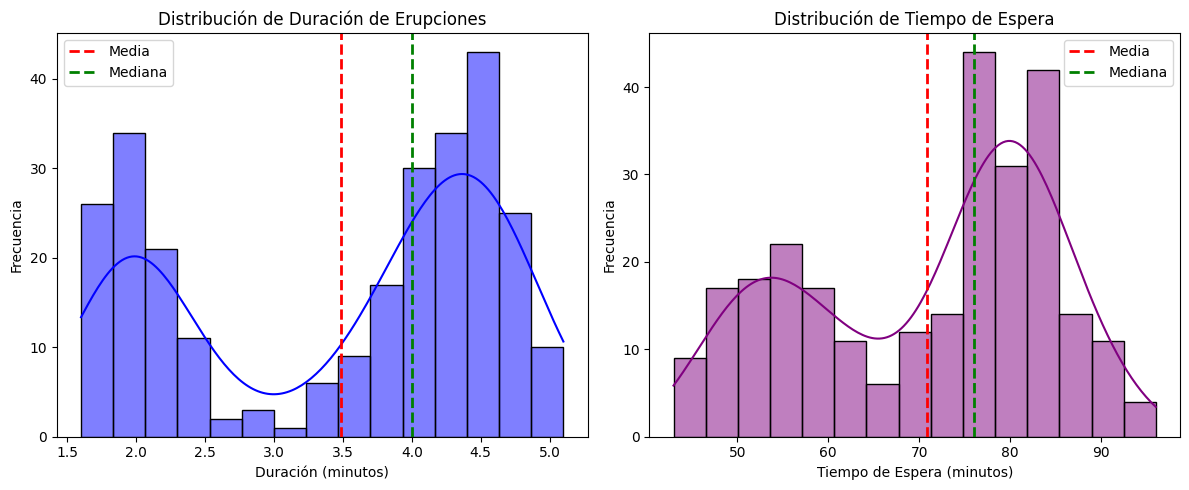

In [98]:
plt.figure(figsize=(12,5))

# Histograma de duraci√≥n de erupciones
plt.subplot(1,2,1)

# Histograma de tiempo de espera
plt.subplot(1,2,2)


plt.tight_layout()
plt.show()


## Clasificaci√≥n de Erupciones en Cortas y Largas
Para mejorar el an√°lisis, clasificaremos las erupciones en cortas y largas, usando la mediana como referencia.

üîπ Tarea:
‚úîÔ∏è Crea una nueva columna tipo_erupcion donde:

Si la duraci√≥n es menor a la mediana, la etiqueta ser√° "Corta".
Si la duraci√≥n es mayor o igual a la mediana, la etiqueta ser√° "Larga".
‚úîÔ∏è Calcula la tasa promedio de espera para cada tipo.


 Tiempo de Espera Promedio por Tipo de Erupci√≥n:
 tipo_erupcion
Corta    60.611940
Larga    80.884058
Name: waiting, dtype: float64


In [100]:
faithful

eruptions  waiting tipo_erupcion
1        3.600       79         Corta
2        1.800       54         Corta
3        3.333       74         Corta
4        2.283       62         Corta
5        4.533       85         Larga
..         ...      ...           ...
268      4.117       81         Larga
269      2.150       46         Corta
270      4.417       90         Larga
271      1.817       46         Corta
272      4.467       74         Larga

[272 rows x 3 columns]

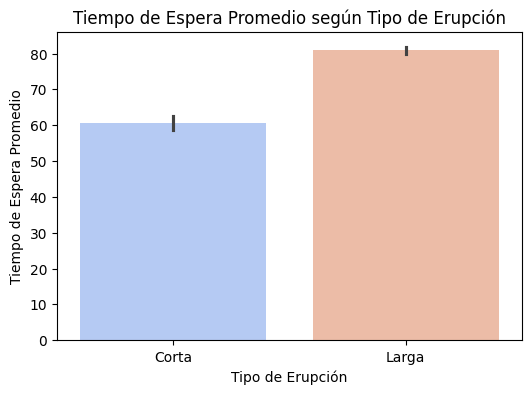

In [101]:
plt.figure(figsize=(6,4))

plt.show()